## **Most demanded skills for the top 3 most popular data roles**

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data
df = pd.read_csv("C:/Users/user/Desktop/packages/data_jobs.csv")

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_posted_month"] = df["job_posted_date"].dt.strftime("%b")
def cleanup(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return skill_list
df["job_skills"] = df["job_skills"].apply(cleanup)

In [3]:
# Filter Data for the United States
df_US = df[df["job_country"] == "United States"].copy()

# Count Skills per Job Title
df_skills = df_US.explode("job_skills")
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name = "skill_count")
df_skills_count.sort_values(by = "skill_count", ascending = False, inplace = True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [4]:
# List of Top 3 Roles
job_titles = df["job_title_short"].value_counts().head(3).index.tolist()
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

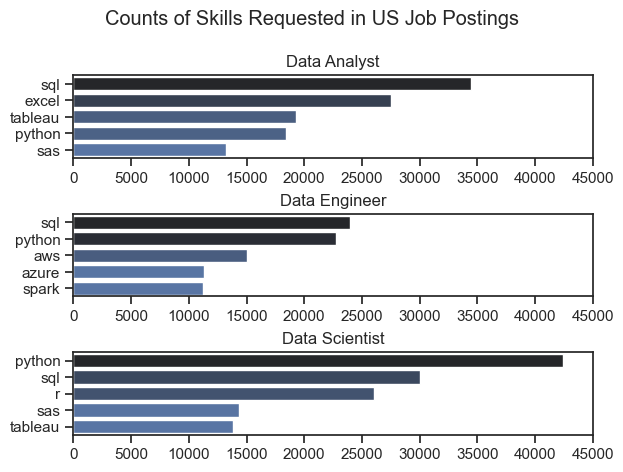

In [6]:
# Plot Skill Counts
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style = "ticks")
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head()
    sns.barplot(
        data = df_plot,
        x = "skill_count",
        y = "job_skills",
        hue = "skill_count",
        palette = "dark:b_r",
        ax = ax[i]
    )
    ax[i].set_title(job_title)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000)
fig.suptitle("Counts of Skills Requested in US Job Postings")
fig.tight_layout(h_pad = 0.5)
plt.show()